<a href="https://colab.research.google.com/github/winee165/Loan-Case-Study/blob/main/Loan_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BY: CHARVY GUGALIA

# LOAN CASE STUDY

In [ ]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Load Dataset


In [ ]:
app_data = pd.read_csv("/content/application_data.csv")

## Print dataset

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Understanding dataset

In [ ]:
app_data.shape

(23282, 122)

In [ ]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,23282.000000,23282.000000,23282.000000,2.328200e+04,2.328200e+04,23282.000000,2.326400e+04,23282.000000,23282.000000,23282.000000,23282.000000,23282.000000,7909.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,10213.000000,23219.000000,18693.000000,11504.000000,9726.000000,11935.000000,7813.000000,6982.000000,10930.000000,11611.000000,11765.000000,...,11611.000000,11765.000000,7508.000000,9478.000000,7355.000000,11573.000000,7113.000000,10508.000000,12068.000000,23200.000000,23200.000000,23200.000000,23200.000000,23280.000000,23281.0,23281.000000,23281.000000,23281.00000,23281.000000,23281.000000,23281.000000,23281.000000,23281.0,23281.000000,23281.0,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,23281.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000,20168.000000
mean,113570.719440,0.079804,0.416373,1.733403e+05,6.002050e+05,27134.236535,5.395397e+05,0.020731,-16010.774805,62798.682459,-4969.199811,-2983.940512,12.018839,0.999957,0.822602,0.201753,0.997938,0.279241,0.056312,2.157897,2.048967,2.028435,12.066535,0.016322,0.051244,0.039990,0.080624,0.232507,0.179674,0.504331,0.514939,0.512077,0.117412,0.089388,0.978775,0.750221,0.044031,0.077382,0.151067,0.224042,...,0.150705,0.223608,0.230910,0.067879,0.101829,0.108563,0.008930,0.027925,0.101816,1.424612,0.144871,1.408621,0.100862,-961.523325,0.0,0.711696,0.000215,0.01542,0.085907,0.000129,0.080366,0.003780,0.0,0.004381,0.0,0.003179,0.002663,0.000859,0.010910,0.000215,0.007818,0.000644,0.000558,0.000515,0.007388,0.007586,0.032576,0.275932,0.263288,1.888388
std,7830.755945,0.270996,0.719606,7.720617e+05,4.022264e+05,14607.498468,3.698661e+05,0.013776,4351.106672,140445.941033,3524.993934,1513.157690,11.846270,0.006554,0.382013,0.401317,0.045361,0.448636,0.230528,0.905680,0.507088,0.501766,3.228138,0.126715,0.220499,0.195939,0.272262,0.422440,0.383924,0.210762,0.190157,0.194317,0.107829,0.083137,0.049378,0.113426,0.077540,0.133476,0.100072,0.143826,...,0.100399,0.144321,0.160051,0.082258,0.095051,0.110762,0.048591,0.069270,0.105448,2.321020,0.446938,2.303404,0.364367,825.831338,0.0,0.452983,0.014654,0.12322,0.280233,0.011351,0.271865,0.061366,0.0,0.066047,0.0,0.056290,0.051538,0.029298,0.103883,0.014654,0.088072,0.025375,0.023624,0.022698,0.087357,0.113509,0.196866,0.955535,0.613881,1.864287
min,100002.00000

In [ ]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
app_data.isnull().sum().head(10)

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
dtype: int64

In [ ]:
app_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23282 entries, 0 to 23281
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED            

# Cleaning Dataset

In [ ]:
per_null=round((app_data.isnull().sum()*100/len(app_data)),2).sort_values(ascending=False)
per_null

COMMONAREA_AVG                 70.01
COMMONAREA_MODE                70.01
COMMONAREA_MEDI                70.01
NONLIVINGAPARTMENTS_MODE       69.45
NONLIVINGAPARTMENTS_AVG        69.45
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

In [ ]:
app_data=app_data[app_data.columns[app_data.isnull().mean() < 0.5]]

In [ ]:
app_data.shape

(23282, 82)

In [ ]:
app_data=app_data[app_data.isnull().sum(axis=1)<=8]
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1.0,1.0,0.0,1.0,1.0,0.0,Laborers,1.0,2.0,2.0,WEDNESDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,...,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,block of flats,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1.0,1.0,0.0,1.0,1.0,0.0,Core staff,2.0,1.0,1.0,MONDAY,11.0,0.0,0.0,0.0,0.0,0.0,0.0,School,...,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,block of flats,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,1.0,1.0,1.0,1.0,1.0,0.0,Laborers,2.0,2.0,2.0,FRIDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 2,...,0.9811,0.1667,0.9811,0.1667,0.9811,0.1667,block of flats,0.0612,No,0.0,0.0,0.0,0.0,-2370.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,3.0,2.0,2.0,THURSDAY,13.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,...,0.9806,0.3333,0.9806,0.3333,0.9806,0.3333,block of flats,0.1417,No,0.0,0.0,0.0,0.0,-4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,100018,0,Cash loans,F,N,Y,0,189000.0,773680.5,32778.0,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010006,-14583,-203,-615.0,-2056,1.0,1.0,0.0,1.0,0.0,0.0,Laborers,2.0,2.0,1.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 2,...,0.9985,0.6667,0.9985,0.6667,0.9985,0.6667,block of flats,0.3811,No,0.0,0.0,0.0,0.0,-188.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for irrelevent columns

In [ ]:
flag_columns = [col for col in app_data.columns if "FLAG" in col]
flag_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [ ]:
flag_df = app_data[flag_columns+["TARGET"]]
for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

In [ ]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,1
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
12,N,Y,Y,Y,Y,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
13,Y,N,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
14,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0


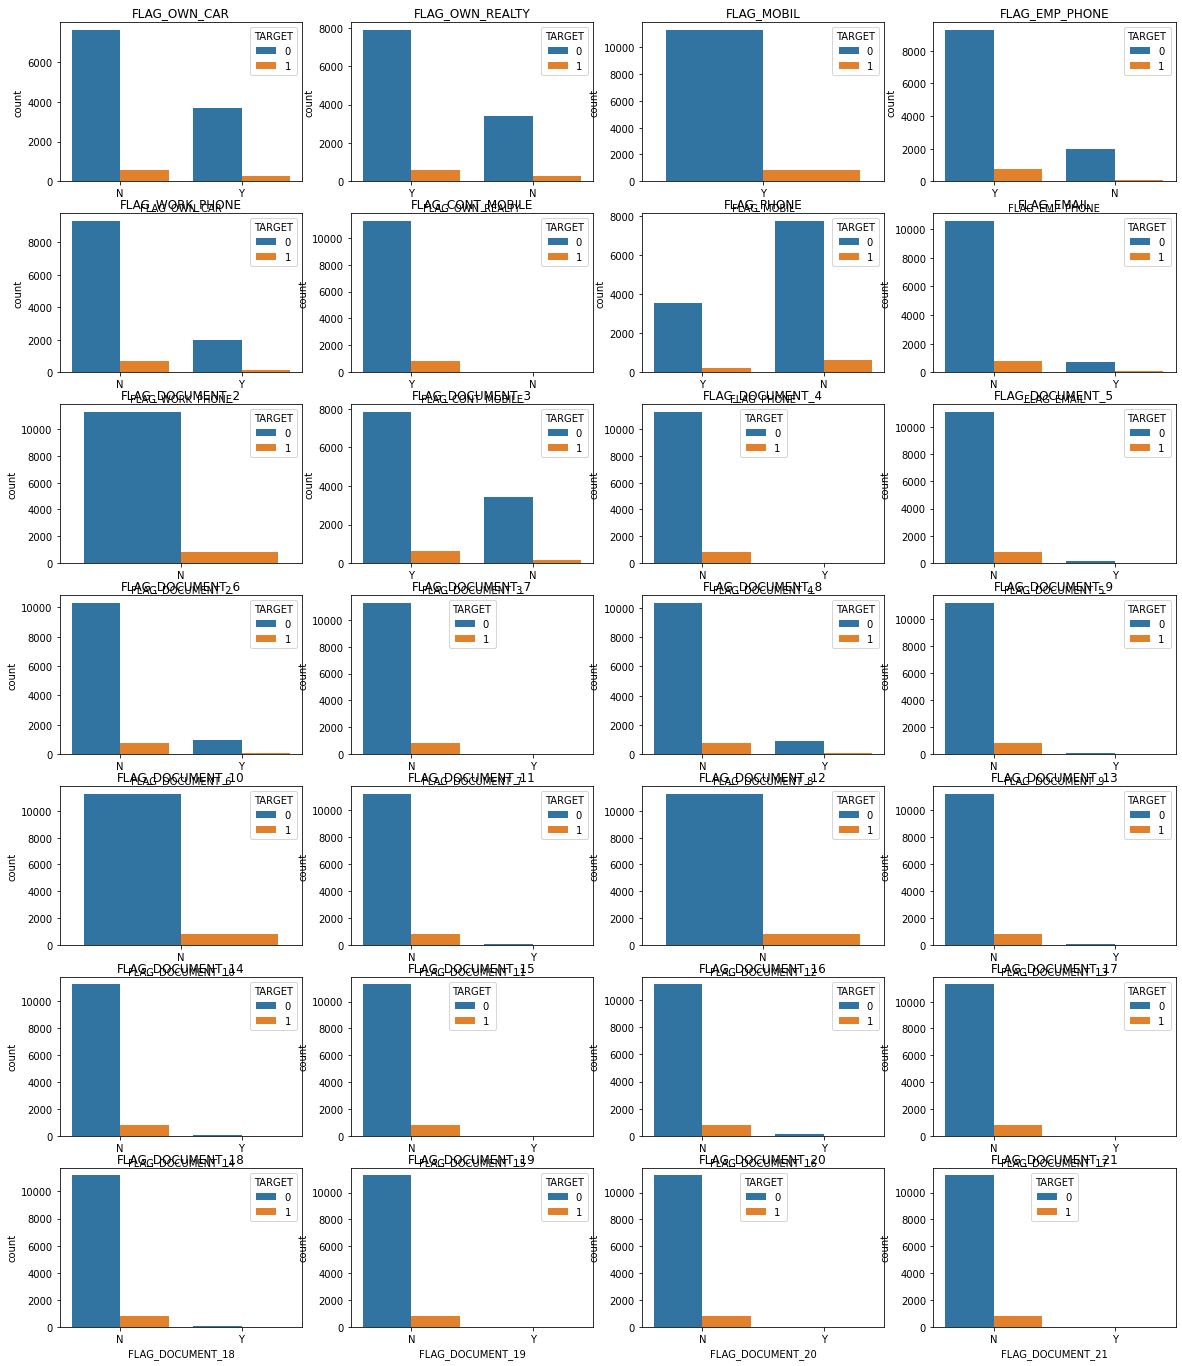

In [ ]:
import itertools 
plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"])
    plt.title(i)

In [ ]:
flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [ ]:
app_data.drop(flag_df.columns, axis=1, inplace= True)

In [ ]:
app_data.shape

(12121, 57)

## Dealing With Missing Values

In [ ]:
round((app_data.isnull().sum()*100/len(app_data)),2).sort_values(ascending=False)

OCCUPATION_TYPE                 30.81
EXT_SOURCE_3                    17.80
AMT_REQ_CREDIT_BUREAU_YEAR      11.69
AMT_REQ_CREDIT_BUREAU_MON       11.69
AMT_REQ_CREDIT_BUREAU_WEEK      11.69
AMT_REQ_CREDIT_BUREAU_DAY       11.69
AMT_REQ_CREDIT_BUREAU_HOUR      11.69
AMT_REQ_CREDIT_BUREAU_QRT       11.69
HOUSETYPE_MODE                   4.18
FLOORSMAX_MODE                   3.24
FLOORSMAX_MEDI                   3.24
FLOORSMAX_AVG                    3.24
YEARS_BEGINEXPLUATATION_MEDI     2.06
YEARS_BEGINEXPLUATATION_MODE     2.06
YEARS_BEGINEXPLUATATION_AVG      2.06
TOTALAREA_MODE                   1.11
NAME_TYPE_SUITE                  0.47
DEF_60_CNT_SOCIAL_CIRCLE         0.32
OBS_30_CNT_SOCIAL_CIRCLE         0.32
DEF_30_CNT_SOCIAL_CIRCLE         0.32
OBS_60_CNT_SOCIAL_CIRCLE         0.32
EXT_SOURCE_2                     0.23
AMT_GOODS_PRICE                  0.07
TARGET                           0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
NAME_FAMILY_

In [ ]:
app_data=app_data.drop(columns=["FLOORSMAX_AVG",
"FLOORSMAX_MODE",
"FLOORSMAX_MEDI",
"YEARS_BEGINEXPLUATATION_AVG",   
"YEARS_BEGINEXPLUATATION_MODE",   
"YEARS_BEGINEXPLUATATION_MEDI",    
"TOTALAREA_MODE",                  
"EMERGENCYSTATE_MODE"])

In [ ]:
app_data.shape

(12121, 49)

### Imputing for "OCCUPATION_TYPE" column


In [ ]:
app_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100


Laborers                 25.384524
Sales staff              14.808632
Core staff               13.127459
Managers                 11.124359
Drivers                   7.750089
High skill tech staff     6.378920
Accountants               5.115059
Medicine staff            4.077739
Security staff            2.730416
Cooking staff             2.384643
Cleaning staff            2.372720
Private service staff     1.550018
Low-skill Laborers        0.786932
Secretaries               0.691546
Waiters/barmen staff      0.596161
Realty agents             0.500775
HR staff                  0.333850
IT staff                  0.286157
Name: OCCUPATION_TYPE, dtype: float64

In [ ]:
# filling missing values as unknown
app_data["OCCUPATION_TYPE"] = app_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [ ]:
app_data["OCCUPATION_TYPE"].isnull().sum()

0

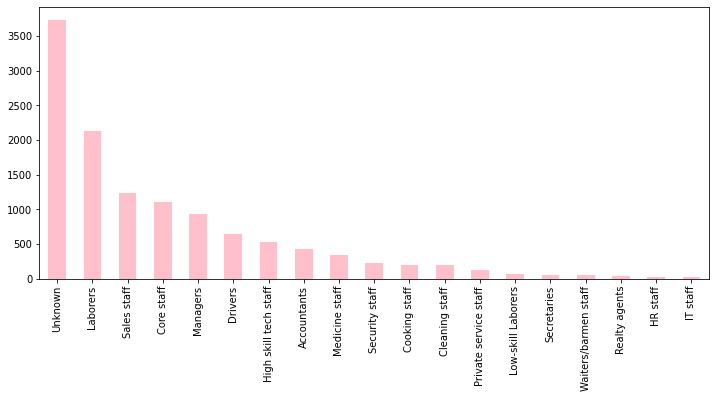

In [ ]:
plt.figure(figsize = [12,5])
(app_data["OCCUPATION_TYPE"].value_counts()).plot.bar(color="Pink")
plt.show()

In [ ]:
app_data[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000,10704.000000
mean,1.891910,0.271861,0.327261,0.036155,0.009342,0.009249
std,1.878341,0.629471,1.068547,0.215491,0.134307,0.097662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,8.000000,24.000000,5.000000,5.000000,2.000000


In [ ]:
amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]
app_data.fillna(app_data[amt_credit].median(),inplace = True)

In [ ]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,12121.000000,12121.000000,12121.000000,1.212100e+04,1.212100e+04,12121.000000,1.211300e+04,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.0,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12093.000000,9964.000000,12082.000000,12082.000000,12082.000000,12082.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000
mean,113560.630559,0.069136,0.393119,1.896748e+05,6.249312e+05,28101.969846,5.644329e+05,0.022091,-16135.776504,60936.338091,-5230.662322,-3016.428925,1.0,2.108407,1.981850,1.949344,12.290488,0.013365,0.047108,0.039106,0.039188,0.124330,0.103869,0.537207,0.515125,1.380649,0.134829,1.364675,0.094024,-986.721228,0.700437,0.008168,0.008250,0.031928,0.289003,0.240079,1.787641
std,7854.974281,0.253696,0.684686,1.066178e+06,4.207211e+05,15392.215283,3.886326e+05,0.015498,4334.940776,138926.967281,3639.218101,1520.319976,0.0,0.884481,0.537996,0.525810,3.271214,0.114838,0.211879,0.193854,0.194050,0.329971,0.305104,0.185618,0.193093,2.284724,0.422777,2.268524,0.344910,843.296605,0.458085,0.091824,0.126248,0.202835,1.009633,0.597945,1.788241
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.001276,-25182.000000,-16365.000000,-21244.000000,-6223.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000527,0.000000,0.000000,0.000000,0.000000,-3983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106702.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16875.000000,2.475000e+05,0.010032,-19680.000000,-2881.000000,-7901.000000,-4310.000000,1.0,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431128,0.377404,0.000000,0.000000,0.000000,0.000000,-1592.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,113533.000000,0.000000,0.000000,1.575000e+05,5.264910e+05,25839.000000,4.545000e+05,0.019101,-15842.000000,-1264.000000,-4839.000000,-3360.000000,1.0,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.589155,0.538863,0.000000,0.000000,0.000000,0.000000,-786.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,120454.000000,0.000000,1.000000,2.250000e+05,8.550000e+05,36000.000000,7.200000e+05,0.028663,-12566.000000,-295.000000,-2067.000000,-1720.000000,1.0,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680692,0.670652,2.000000,0.000000,2.000000,0.000000,-270.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,127082.000000,1.000000,7.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7680.000000,365243.000000,0.000000,-1.000000,1.0,9.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820616,0.881027,22.000000,5.000000,21.000000,4.000000,0.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,13.000000


In [ ]:
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000
mean,-16135.776504,60936.338091,-5230.662322,-3016.428925,-986.721228
std,4334.940776,138926.967281,3639.218101,1520.319976,843.296605
min,-25182.000000,-16365.000000,-21244.000000,-6223.000000,-3983.000000
25%,-19680.000000,-2881.000000,-7901.000000,-4310.000000,-1592.000000
50%,-15842.000000,-1264.000000,-4839.000000,-3360.000000,-786.000000
75%,-12566.000000,-295.000000,-2067.000000,-1720.000000,-270.000000
max,-7680.000000,365243.000000,0.000000,-1.000000,0.000000


In [ ]:
app_data[days_col]= abs(app_data[days_col])
app_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000
mean,16135.776504,65019.914694,5230.662322,3016.428925,986.721228
std,4334.940776,137063.152572,3639.218101,1520.319976,843.296605
min,7680.000000,4.000000,0.000000,1.000000,0.000000
25%,12566.000000,938.000000,2067.000000,1720.000000,270.000000
50%,15842.000000,2226.000000,4839.000000,3360.000000,786.000000
75%,19680.000000,5693.000000,7901.000000,4310.000000,1592.000000
max,25182.000000,365243.000000,21244.000000,6223.000000,3983.000000


In [ ]:
app_data["AGE"] = app_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

app_data["AGE_GROUP"] = pd.cut(app_data["AGE"], bins=bins, labels=slots)

In [ ]:
app_data["AGE_GROUP"].value_counts(normalize= True)*100

40-45       14.231499
35-40       13.637489
30-35       13.134230
60 Above    12.193713
45-50       11.673954
50-55       11.368699
55-60       10.386932
25-30        9.792921
20-25        3.580563
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [ ]:
app_data["YEARS_EMPLOYED"] = app_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

app_data["EMPLOYEMENT_YEARS"] = pd.cut(app_data["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [ ]:
app_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         53.314724
5-10        25.171967
10-15       11.135480
15-20        4.605722
20-25        2.791347
25-30        1.495364
30 Above     1.485395
Name: EMPLOYEMENT_YEARS, dtype: float64

## Identifying outliers

In [ ]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,12121.000000,12121.000000,12121.000000,1.212100e+04,1.212100e+04,12121.000000,1.211300e+04,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.0,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12093.000000,9964.000000,12082.000000,12082.000000,12082.000000,12082.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000,12121.000000
mean,113560.630559,0.069136,0.393119,1.896748e+05,6.249312e+05,28101.969846,5.644329e+05,0.022091,16135.776504,65019.914694,5230.662322,3016.428925,1.0,2.108407,1.981850,1.949344,12.290488,0.013365,0.047108,0.039106,0.039188,0.124330,0.103869,0.537207,0.515125,1.380649,0.134829,1.364675,0.094024,986.721228,0.700437,0.008168,0.008250,0.031928,0.289003,0.240079,1.787641,44.207607,178.136753
std,7854.974281,0.253696,0.684686,1.066178e+06,4.207211e+05,15392.215283,3.886326e+05,0.015498,4334.940776,137063.152572,3639.218101,1520.319976,0.0,0.884481,0.537996,0.525810,3.271214,0.114838,0.211879,0.193854,0.194050,0.329971,0.305104,0.185618,0.193093,2.284724,0.422777,2.268524,0.344910,843.296605,0.458085,0.091824,0.126248,0.202835,1.009633,0.597945,1.788241,11.876550,375.515486
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2052.000000,4.500000e+04,0.001276,7680.000000,4.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000044,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.041096,0.010959
25%,106702.000000,0.000000,0.000000,1.125000e+05,2.736360e+05,16875.000000,2.475000e+05,0.010032,12566.000000,938.000000,2067.000000,1720.000000,1.0,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431128,0.377404,0.000000,0.000000,0.000000,0.000000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34.427397,2.569863
50%,113533.000000,0.000000,0.000000,1.575000e+05,5.264910e+05,25839.000000,4.545000e+05,0.019101,15842.000000,2226.000000,4839.000000,3360.000000,1.0,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.589155,0.538863,0.000000,0.000000,0.000000,0.000000,786.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.402740,6.098630
75%,120454.000000,0.000000,1.000000,2.250000e+05,8.550000e+05,36000.000000,7.200000e+05,0.028663,19680.000000,5693.000000,7901.000000,4310.000000,1.0,3.000000,2.000000,2.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.680692,0.670652,2.000000,0.000000,2.000000,0.000000,1592.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.917808,15.597260
max,127082.000000,1.000000,7.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25182.000000,365243.000000,21244.000000,6223.000000,1.0,9.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.820616,0.881027,22.000000,5.000000,21.000000,4.000000,3983.000000,1.000000,2.000000,5.000000,5.000000,24.000000,8.000000,13.000000,68.991781,1000.665753


columns with high difference between max and 75 percentile and which have max value high are most prominent to be containing outliers.

In [ ]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

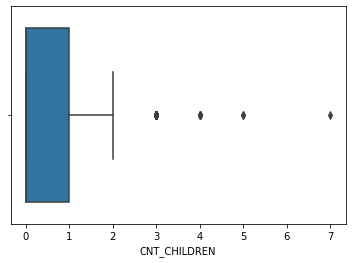

In [ ]:
sns.boxplot("CNT_CHILDREN",data=app_data)


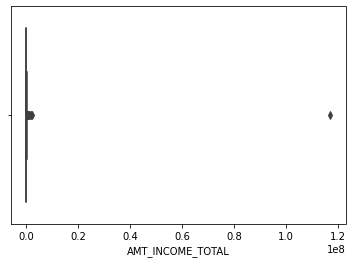

In [ ]:
sns.boxplot("AMT_INCOME_TOTAL",data=app_data)

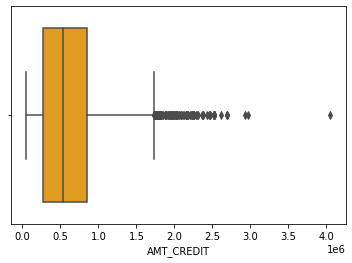

In [ ]:
sns.boxplot("AMT_CREDIT",data=app_data,color="Orange")

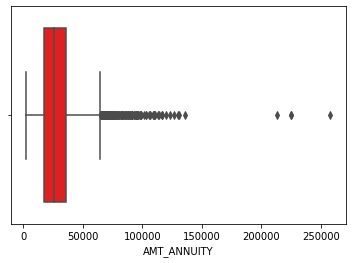

In [ ]:
sns.boxplot("AMT_ANNUITY",data=app_data,color="red")

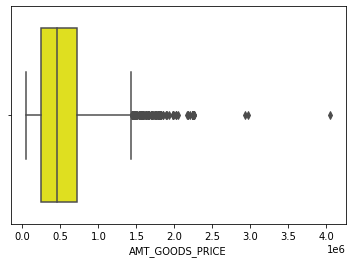

In [ ]:
sns.boxplot("AMT_GOODS_PRICE",data=app_data,color="yellow")

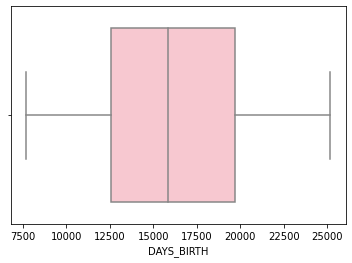

In [ ]:
sns.boxplot("DAYS_BIRTH",data=app_data,color="pink")

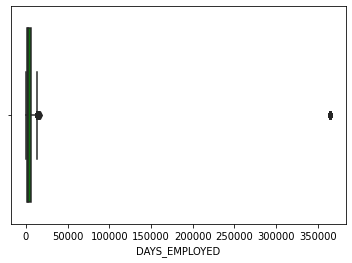

In [ ]:
sns.boxplot("DAYS_EMPLOYED",data=app_data,color="green")

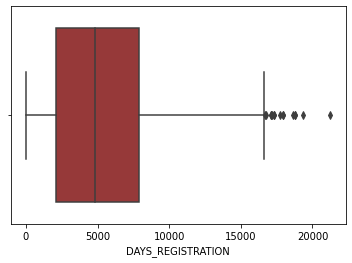

In [ ]:
sns.boxplot("DAYS_REGISTRATION",data=app_data,color="brown")


1.   AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers
2.   AMT_INCOME_TOTAL has very large numbers of outliers that show that few of the loan applicants have high income when compared to the others.
3. DAYS_BIRTH has no outliers which means the data available is reliable.



In [ ]:
app_data.nunique().sort_values()

FLAG_MOBIL                         1
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        2
FLAG_OWN_REALTY                    2
LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY             2
LIVE_REGION_NOT_WORK_REGION        2
REG_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_LIVE_REGION         2
FLAG_DOCUMENT_3                    2
AMT_REQ_CREDIT_BUREAU_HOUR         3
REGION_RATING_CLIENT_W_CITY        3
REGION_RATING_CLIENT               3
HOUSETYPE_MODE                     3
DEF_60_CNT_SOCIAL_CIRCLE           5
NAME_FAMILY_STATUS                 5
NAME_EDUCATION_TYPE                5
AMT_REQ_CREDIT_BUREAU_DAY          6
DEF_30_CNT_SOCIAL_CIRCLE           6
NAME_HOUSING_TYPE                  6
NAME_INCOME_TYPE                   6
AMT_REQ_CREDIT_BUREAU_WEEK         6
CNT_CHILDREN                       7
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
E

In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12121 entries, 0 to 23279
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   12121 non-null  int64   
 1   TARGET                       12121 non-null  int64   
 2   NAME_CONTRACT_TYPE           12121 non-null  object  
 3   CODE_GENDER                  12121 non-null  object  
 4   FLAG_OWN_REALTY              12121 non-null  object  
 5   CNT_CHILDREN                 12121 non-null  int64   
 6   AMT_INCOME_TOTAL             12121 non-null  float64 
 7   AMT_CREDIT                   12121 non-null  float64 
 8   AMT_ANNUITY                  12121 non-null  float64 
 9   AMT_GOODS_PRICE              12113 non-null  float64 
 10  NAME_TYPE_SUITE              12064 non-null  object  
 11  NAME_INCOME_TYPE             12121 non-null  object  
 12  NAME_EDUCATION_TYPE          12121 non-null  object  
 13  N

### Converting object type columns to categorical columns

In [ ]:
cat_col=["ORGANIZATION_TYPE",        
"NAME_CONTRACT_TYPE",          
"CODE_GENDER",  
"FLAG_OWN_REALTY",                  
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",  
"NAME_EDUCATION_TYPE", 
"NAME_FAMILY_STATUS",           
"NAME_HOUSING_TYPE",
"WEEKDAY_APPR_PROCESS_START",                        
"OCCUPATION_TYPE"]

for col in cat_col:
    app_data[col] = pd.Categorical(app_data[col])

In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12121 entries, 0 to 23279
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   12121 non-null  int64   
 1   TARGET                       12121 non-null  int64   
 2   NAME_CONTRACT_TYPE           12121 non-null  category
 3   CODE_GENDER                  12121 non-null  category
 4   FLAG_OWN_REALTY              12121 non-null  category
 5   CNT_CHILDREN                 12121 non-null  int64   
 6   AMT_INCOME_TOTAL             12121 non-null  float64 
 7   AMT_CREDIT                   12121 non-null  float64 
 8   AMT_ANNUITY                  12121 non-null  float64 
 9   AMT_GOODS_PRICE              12113 non-null  float64 
 10  NAME_TYPE_SUITE              12064 non-null  category
 11  NAME_INCOME_TYPE             12121 non-null  category
 12  NAME_EDUCATION_TYPE          12121 non-null  category
 13  N

## PREVIOUS APPLICATION DATA IMPORTING AND READING

In [ ]:
prev_app = pd.read_csv("previous_application.csv")

### Print Dataset

In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding dataset

In [ ]:
prev_app.shape

(55461, 37)

In [ ]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55461 entries, 0 to 55460
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   55461 non-null  int64  
 1   SK_ID_CURR                   55461 non-null  int64  
 2   NAME_CONTRACT_TYPE           55461 non-null  object 
 3   AMT_ANNUITY                  43739 non-null  float64
 4   AMT_APPLICATION              55461 non-null  float64
 5   AMT_CREDIT                   55461 non-null  float64
 6   AMT_DOWN_PAYMENT             27462 non-null  float64
 7   AMT_GOODS_PRICE              43533 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   55461 non-null  object 
 9   HOUR_APPR_PROCESS_START      55461 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  55461 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       55461 non-null  int64  
 12  RATE_DOWN_PAYMENT            27462 non-null  float64
 13  RATE_INTEREST_PR

In [ ]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,5.546100e+04,55461.000000,43739.00000,5.546100e+04,5.546100e+04,2.746200e+04,4.353300e+04,55461.000000,55461.000000,27462.000000,179.000000,179.000000,55461.000000,5.546000e+04,43738.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000
mean,1.922500e+06,278855.939759,15469.95730,1.689337e+05,1.886855e+05,6.485520e+03,2.152426e+05,12.482141,0.996556,0.078855,0.201480,0.787662,-901.404573,3.953075e+02,15.529768,344228.837283,14108.253459,31653.576615,76827.117244,81853.149086,0.323420
std,5.355828e+05,102729.039636,14546.12246,2.826052e+05,3.090059e+05,1.725802e+04,3.029840e+05,3.330772,0.058584,0.107374,0.110951,0.092467,786.588547,1.703611e+04,13.976965,85173.099086,73099.162803,103871.999000,149829.185957,153223.137273,0.467788
min,1.000001e+06,100007.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059135,0.424419,-2922.000000,-1.000000e+00,0.000000,-2910.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000
25%,1.457031e+06,189912.000000,6116.46750,2.205000e+04,2.606400e+04,0.000000e+00,4.925250e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1339.000000,-1.000000e+00,6.000000,365243.000000,-1641.000000,-1268.000000,-1336.000000,-1292.000000,0.000000
50%,1.921034e+06,278941.000000,10854.13500,7.145550e+04,7.879500e+04,1.552500e+03,1.038780e+05,12.000000,1.000000,0.049637,0.189136,0.835095,-601.000000,1.000000e+01,12.000000,365243.000000,-822.000000,-365.000000,-536.000000,-499.000000,0.000000
75%,2.389805e+06,368329.000000,19659.19500,1.800000e+05,1.978200e+05,7.737750e+03,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-293.000000,1.000000e+02,18.000000,365243.000000,-404.250000,113.000000,-71.000000,-44.000000,1.000000
max,2.845367e+06,456254.000000,234478.39500,3.826372e+06,4.104351e+06,1.035000e+06,3.826372e+06,23.000000,1.000000,0.944776,1.000000,0.867336,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
round((prev_app.isnull().sum()*100/len(prev_app)),2).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.68
RATE_INTEREST_PRIMARY          99.68
RATE_DOWN_PAYMENT              50.48
AMT_DOWN_PAYMENT               50.48
NAME_TYPE_SUITE                48.45
DAYS_TERMINATION               38.22
NFLAG_INSURED_ON_APPROVAL      38.22
DAYS_FIRST_DRAWING             38.22
DAYS_FIRST_DUE                 38.22
DAYS_LAST_DUE_1ST_VERSION      38.22
DAYS_LAST_DUE                  38.22
AMT_GOODS_PRICE                21.51
CNT_PAYMENT                    21.14
AMT_ANNUITY                    21.14
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

### Dropping columns with huge NULL Values

In [ ]:
prev_app=prev_app[prev_app.columns[prev_app.isnull().mean() < 0.5]]

In [ ]:
round((prev_app.isnull().sum()*100/len(prev_app)),2).sort_values(ascending=False)

NAME_TYPE_SUITE                48.45
DAYS_FIRST_DUE                 38.22
DAYS_TERMINATION               38.22
DAYS_FIRST_DRAWING             38.22
NFLAG_INSURED_ON_APPROVAL      38.22
DAYS_LAST_DUE_1ST_VERSION      38.22
DAYS_LAST_DUE                  38.22
AMT_GOODS_PRICE                21.51
CNT_PAYMENT                    21.14
AMT_ANNUITY                    21.14
PRODUCT_COMBINATION             0.02
NAME_CASH_LOAN_PURPOSE          0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
N

In [ ]:
prev_app_15=prev_app[prev_app.columns[prev_app.isnull().mean() > 0.15]]
prev_app_15.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,NaN,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,Unaccompanied,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,"Spouse, partner",12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN


### Filling in Missing Values

In [ ]:
prev_app["NAME_TYPE_SUITE"] = prev_app["NAME_TYPE_SUITE"].fillna("Unknown")

In [ ]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,5.546100e+04,55461.000000,43739.00000,5.546100e+04,5.546100e+04,4.353300e+04,55461.000000,55461.000000,55461.000000,5.546000e+04,43738.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000
mean,1.922500e+06,278855.939759,15469.95730,1.689337e+05,1.886855e+05,2.152426e+05,12.482141,0.996556,-901.404573,3.953075e+02,15.529768,344228.837283,14108.253459,31653.576615,76827.117244,81853.149086,0.323420
std,5.355828e+05,102729.039636,14546.12246,2.826052e+05,3.090059e+05,3.029840e+05,3.330772,0.058584,786.588547,1.703611e+04,13.976965,85173.099086,73099.162803,103871.999000,149829.185957,153223.137273,0.467788
min,1.000001e+06,100007.000000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000,-2910.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000
25%,1.457031e+06,189912.000000,6116.46750,2.205000e+04,2.606400e+04,4.925250e+04,10.000000,1.000000,-1339.000000,-1.000000e+00,6.000000,365243.000000,-1641.000000,-1268.000000,-1336.000000,-1292.000000,0.000000
50%,1.921034e+06,278941.000000,10854.13500,7.145550e+04,7.879500e+04,1.038780e+05,12.000000,1.000000,-601.000000,1.000000e+01,12.000000,365243.000000,-822.000000,-365.000000,-536.000000,-499.000000,0.000000
75%,2.389805e+06,368329.000000,19659.19500,1.800000e+05,1.978200e+05,2.250000e+05,15.000000,1.000000,-293.000000,1.000000e+02,18.000000,365243.000000,-404.250000,113.000000,-71.000000,-44.000000,1.000000
max,2.845367e+06,456254.000000,234478.39500,3.826372e+06,4.104351e+06,3.826372e+06,23.000000,1.000000,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Before filling the data, check for the trend in data to find whether to fill the missing values as mean/mode/median.

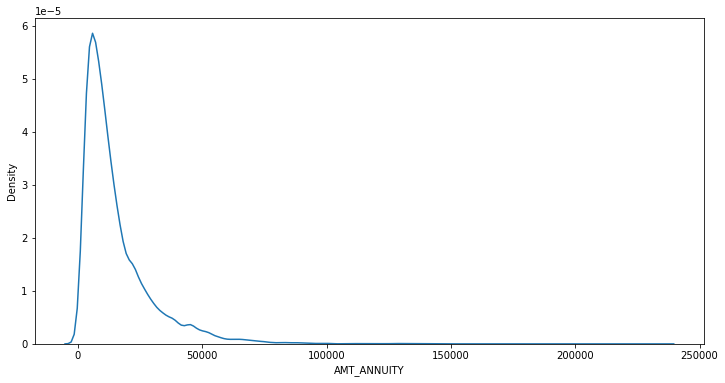

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(prev_app['AMT_ANNUITY'])
plt.show()

In [ ]:
prev_app['AMT_ANNUITY'].fillna(prev_app['AMT_ANNUITY'].median(),inplace = True)

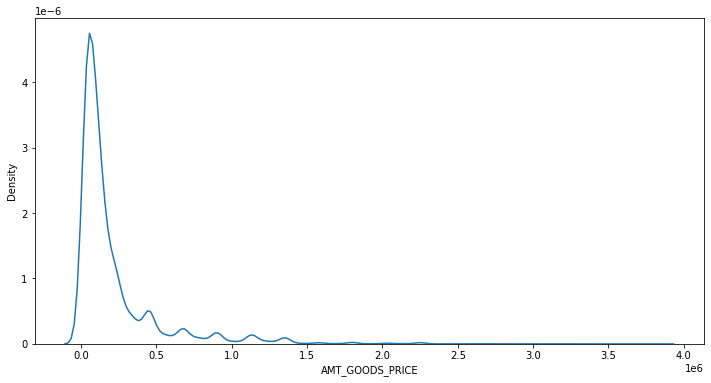

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(prev_app['AMT_GOODS_PRICE'])
plt.show()

In [ ]:
prev_app['AMT_GOODS_PRICE'].fillna(prev_app['AMT_GOODS_PRICE'].mode()[0], inplace=True)

In [ ]:
prev_app.loc[prev_app['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        9456
Refused         1370
Unused offer     896
Approved           1
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
prev_app['CNT_PAYMENT'].fillna(0,inplace = True)

In [ ]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55461 entries, 0 to 55460
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   55461 non-null  int64  
 1   SK_ID_CURR                   55461 non-null  int64  
 2   NAME_CONTRACT_TYPE           55461 non-null  object 
 3   AMT_ANNUITY                  55461 non-null  float64
 4   AMT_APPLICATION              55461 non-null  float64
 5   AMT_CREDIT                   55461 non-null  float64
 6   AMT_GOODS_PRICE              55461 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   55461 non-null  object 
 8   HOUR_APPR_PROCESS_START      55461 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  55461 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       55461 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       55461 non-null  object 
 12  NAME_CONTRACT_STATUS         55461 non-null  object 
 13  DAYS_DECISION   

In [ ]:

p_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical_col:
    prev_app[col] =pd.Categorical(prev_app[col])

CHECKING FOR OUTLIERS

In [ ]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,5.546100e+04,55461.000000,55461.000000,5.546100e+04,5.546100e+04,5.546100e+04,55461.000000,55461.000000,55461.000000,5.546000e+04,55461.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000,34262.000000
mean,1.922500e+06,278855.939759,14494.376820,1.689337e+05,1.886855e+05,1.786285e+05,12.482141,0.996556,-901.404573,3.953075e+02,12.247183,344228.837283,14108.253459,31653.576615,76827.117244,81853.149086,0.323420
std,5.355828e+05,102729.039636,13054.485616,2.826052e+05,3.090059e+05,2.773958e+05,3.330772,0.058584,786.588547,1.703611e+04,13.937895,85173.099086,73099.162803,103871.999000,149829.185957,153223.137273,0.467788
min,1.000001e+06,100007.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000,-2910.000000,-2891.000000,-2800.000000,-2850.000000,-2844.000000,0.000000
25%,1.457031e+06,189912.000000,7180.785000,2.205000e+04,2.606400e+04,4.500000e+04,10.000000,1.000000,-1339.000000,-1.000000e+00,0.000000,365243.000000,-1641.000000,-1268.000000,-1336.000000,-1292.000000,0.000000
50%,1.921034e+06,278941.000000,10854.135000,7.145550e+04,7.879500e+04,7.145550e+04,12.000000,1.000000,-601.000000,1.000000e+01,10.000000,365243.000000,-822.000000,-365.000000,-536.000000,-499.000000,0.000000
75%,2.389805e+06,368329.000000,16239.060000,1.800000e+05,1.978200e+05,1.800000e+05,15.000000,1.000000,-293.000000,1.000000e+02,14.000000,365243.000000,-404.250000,113.000000,-71.000000,-44.000000,1.000000
max,2.845367e+06,456254.000000,234478.395000,3.826372e+06,4.104351e+06,3.826372e+06,23.000000,1.000000,-2.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


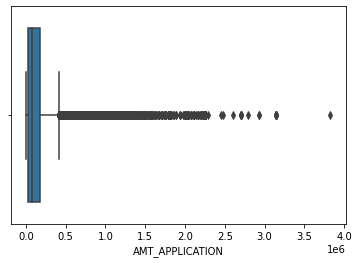

In [ ]:
sns.boxplot("AMT_APPLICATION",data=prev_app)

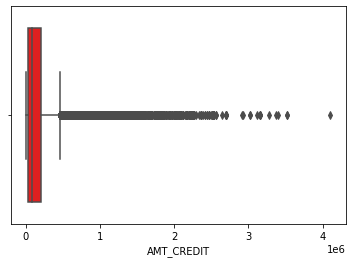

In [ ]:
sns.boxplot("AMT_CREDIT",data=prev_app,color="red")

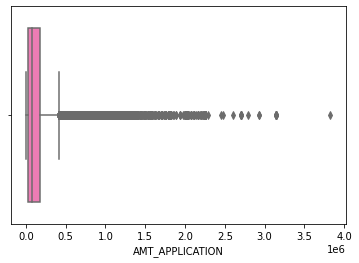

In [ ]:
sns.boxplot("AMT_APPLICATION",data=prev_app,color="hotpink")

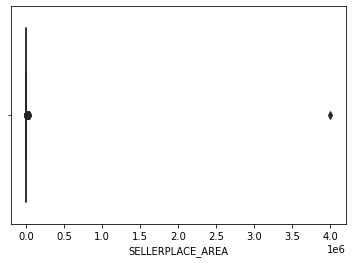

In [ ]:
sns.boxplot("SELLERPLACE_AREA",data=prev_app,color="green")

It can be seen that AMT_APPLICATION, AMT_CREDIT,AMT_GOODS_PRICE and SELLERPLACE_AREA has many outliers.

## Imbalance in Data

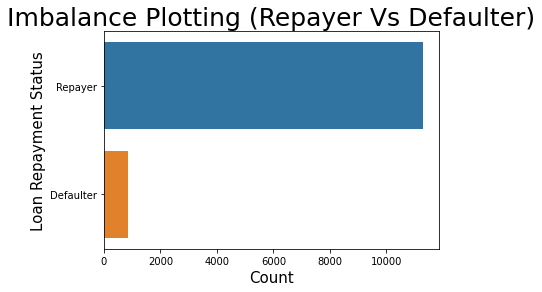

In [ ]:
sns.barplot(y=["Repayer","Defaulter"], x = app_data["TARGET"].value_counts(),orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25})
plt.show()

In [ ]:
#Ratio of imbalance percentage with respect to defaulter and repayer
repayer = round((app_data["TARGET"].value_counts()[0]/len(app_data)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((app_data["TARGET"].value_counts()[1]/len(app_data)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 93.09%
Defaulter Percentage is 6.91%
Imbalance Ratio with respect to Repayer and Defaulter is given: 13.47/1 (approx)


## Results of univariate analysis

### Target value 0 : Repayed
### Target value 1 : Defaulter

<Figure size 1440x720 with 0 Axes>

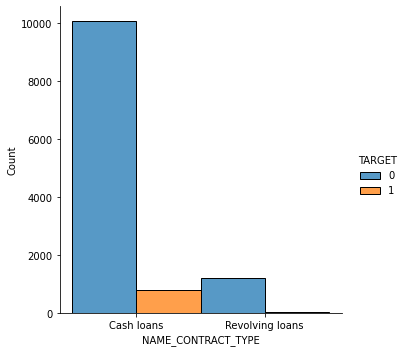

In [115]:
plt.figure(figsize=[20,10])
sns.displot(data=app_data,x="NAME_CONTRACT_TYPE",hue="TARGET",multiple="dodge")
plt.show()

<Figure size 2160x2160 with 0 Axes>

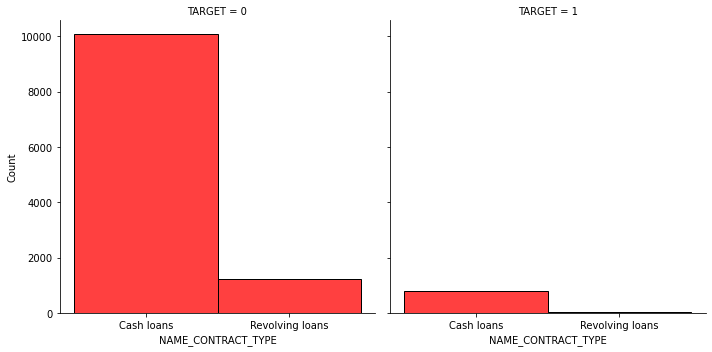

In [116]:
plt.figure(figsize=[30,30])
sns.displot(data=app_data,x="NAME_CONTRACT_TYPE",col="TARGET",color="red")
plt.show()

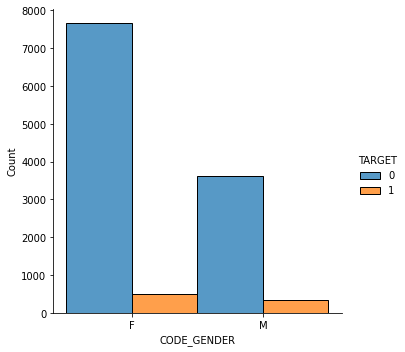

In [117]:
sns.displot(data=app_data,x="CODE_GENDER",hue="TARGET",multiple="dodge")

## So,by analysing the figure it can be seen that the number of defaulters i.e the category with target value as 1, is same for both male and female, but if we take a look over the overall percentage, ***Males*** are more likely to not repay the loan.

<Figure size 14400x2088 with 0 Axes>

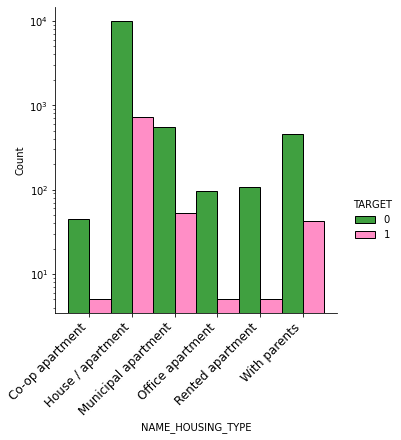

In [133]:
plt.figure(figsize=[200,29])
sns.displot(data=app_data,x="NAME_HOUSING_TYPE",multiple="dodge",hue="TARGET",palette=['green','hotPink'])
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x576 with 0 Axes>

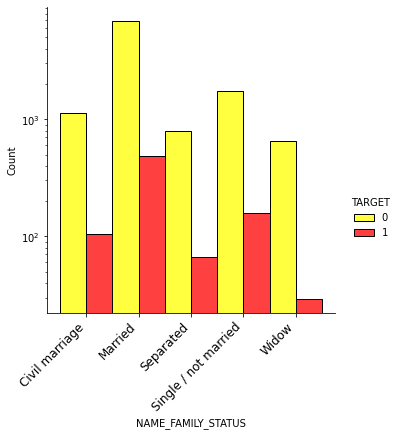

In [137]:
plt.figure(figsize=[20,8])
sns.displot(data=app_data,x="NAME_FAMILY_STATUS",multiple="dodge",hue="TARGET",palette=["yellow","red"])
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x576 with 0 Axes>

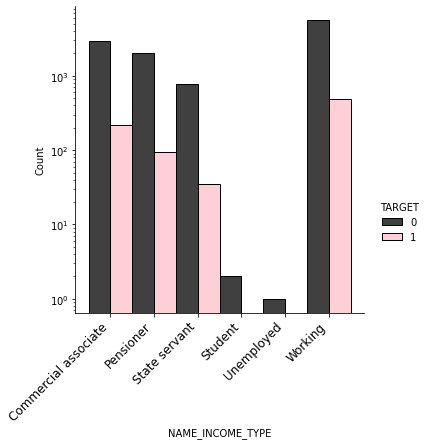

In [138]:
plt.figure(figsize=[20,8])
sns.displot(data=app_data,x="NAME_INCOME_TYPE",multiple="dodge",hue="TARGET",palette=["Black","pink"])
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x576 with 0 Axes>

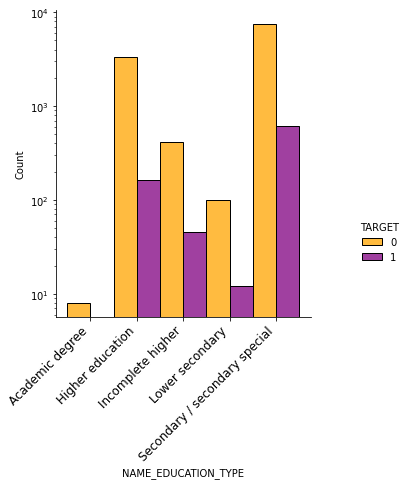

In [139]:
plt.figure(figsize=[20,8])
sns.displot(data=app_data,x="NAME_EDUCATION_TYPE",multiple="dodge",hue="TARGET",palette=["Orange","Purple"])
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 1440x576 with 0 Axes>

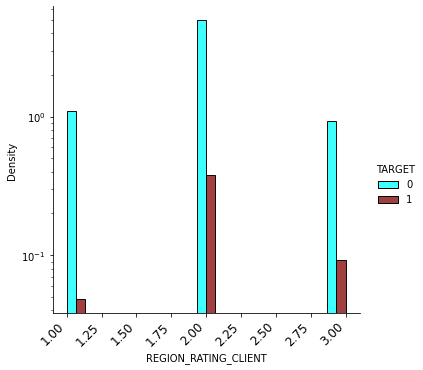

In [149]:

plt.figure(figsize=[20,8])
sns.displot(data=app_data,x="REGION_RATING_CLIENT",multiple="dodge",hue="TARGET",palette=["cyan","maroon"],stat="density")
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()

<Figure size 2880x1440 with 0 Axes>

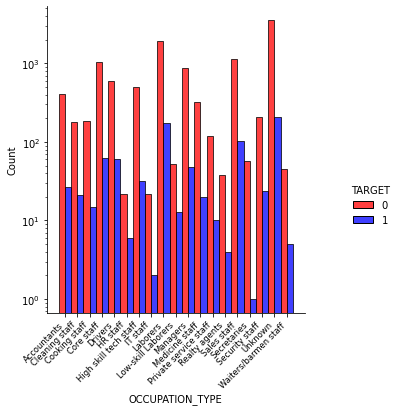

In [150]:
plt.figure(figsize=[40,20])
sns.displot(data=app_data,x="OCCUPATION_TYPE",multiple="dodge",hue="TARGET",palette=["Red","blue"])
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='small'  
)
plt.show()

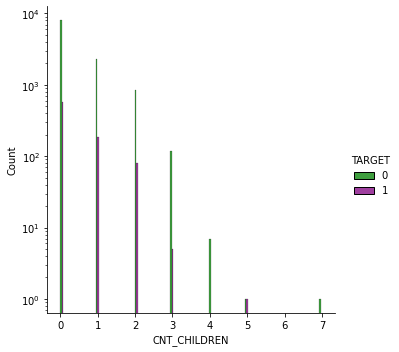

In [168]:
sns.displot(data=app_data,x="CNT_CHILDREN",ax=ax,multiple="dodge",hue="TARGET",palette=["green","Purple"])
plt.yscale('log')
plt.show()

## RESULTS OF BIVARIATE ANALYSIS

In [170]:
app_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Commercial associate,3130.0,215534.689361,1.236850e+05,40500.0,135000.0,180000.0,270000.0,1800000.0
Pensioner,2089.0,143580.095500,8.633022e+04,29250.0,90000.0,126000.0,180000.0,1935000.0
State servant,815.0,196537.350920,9.834039e+04,45000.0,135000.0,180000.0,241200.0,900000.0
Student,2.0,157500.000000,3.181981e+04,135000.0,146250.0,157500.0,168750.0,180000.0
Unemployed,1.0,135000.000000,NaN,135000.0,135000.0,135000.0,135000.0,135000.0
Working,6084.0,191298.161243,1.500689e+06,25650.0,112500.0,157500.0,202500.0,117000000.0


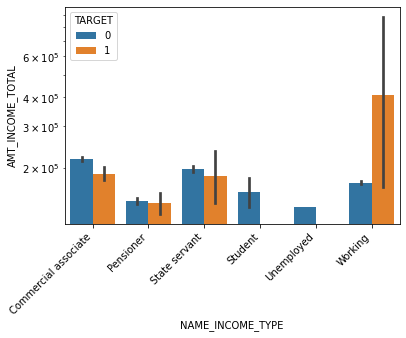

In [180]:
sns.barplot(data=app_data,x="NAME_INCOME_TYPE",y="AMT_INCOME_TOTAL",hue="TARGET")
plt.yscale('log')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
)
plt.show()

### FINDING CORRELATION BETWEEN COLUMNS

In [183]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = app_data.loc[app_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = app_data.loc[app_data['TARGET']==1, cols_for_correlation]

In [184]:
corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.987231
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.931334
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.870709
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.864287
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.857704
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.779376
92,AMT_ANNUITY,AMT_CREDIT,0.773282
216,DAYS_EMPLOYED,DAYS_BIRTH,0.612616
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.592580
365,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.590469


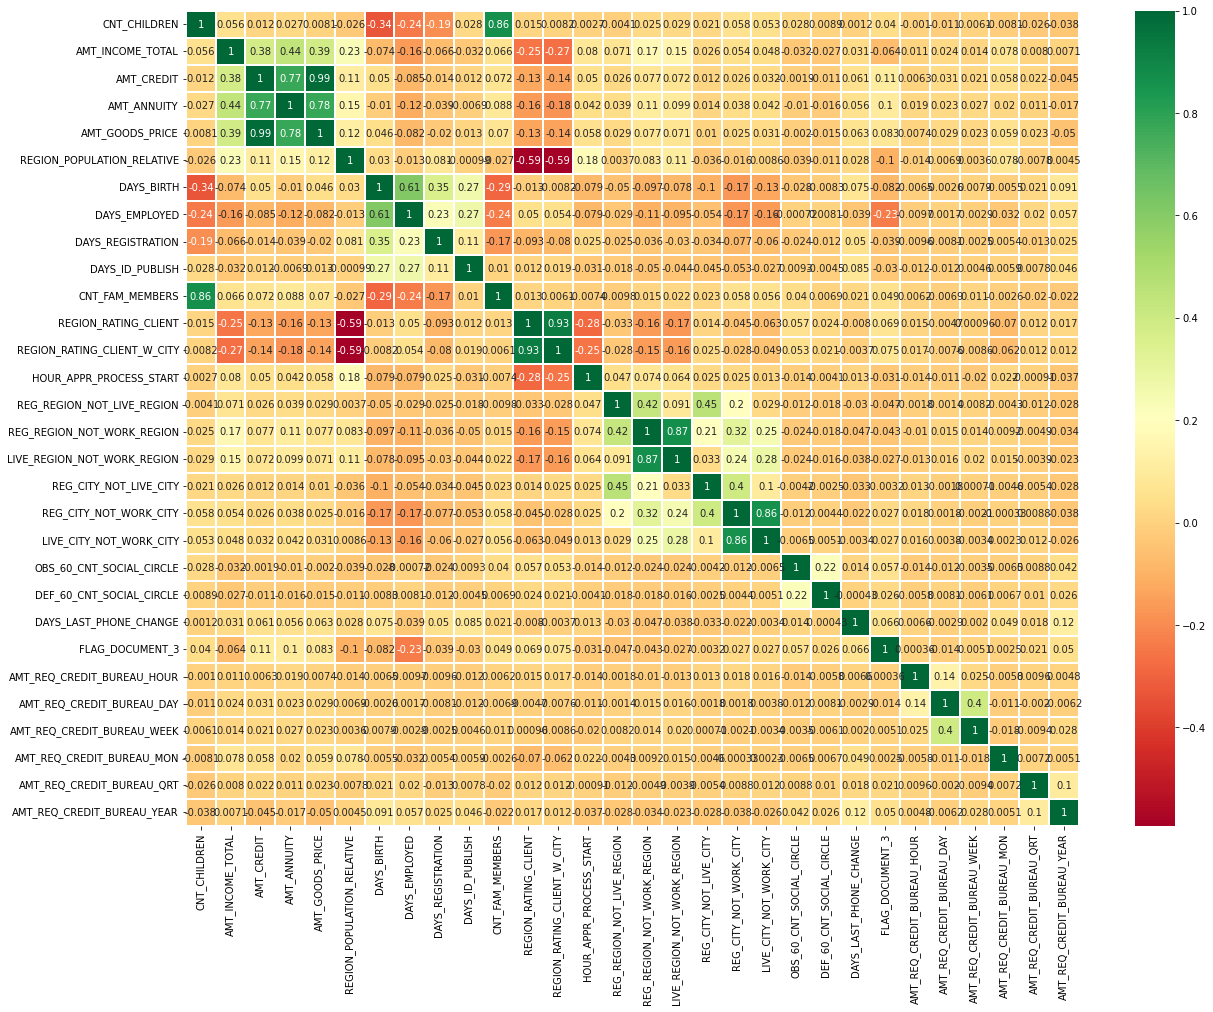

In [185]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

In [191]:
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.985345
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.913453
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.881040
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.871525
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.866616
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.751340
92,AMT_ANNUITY,AMT_CREDIT,0.747492
216,DAYS_EMPLOYED,DAYS_BIRTH,0.591644
774,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.517734
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.498558


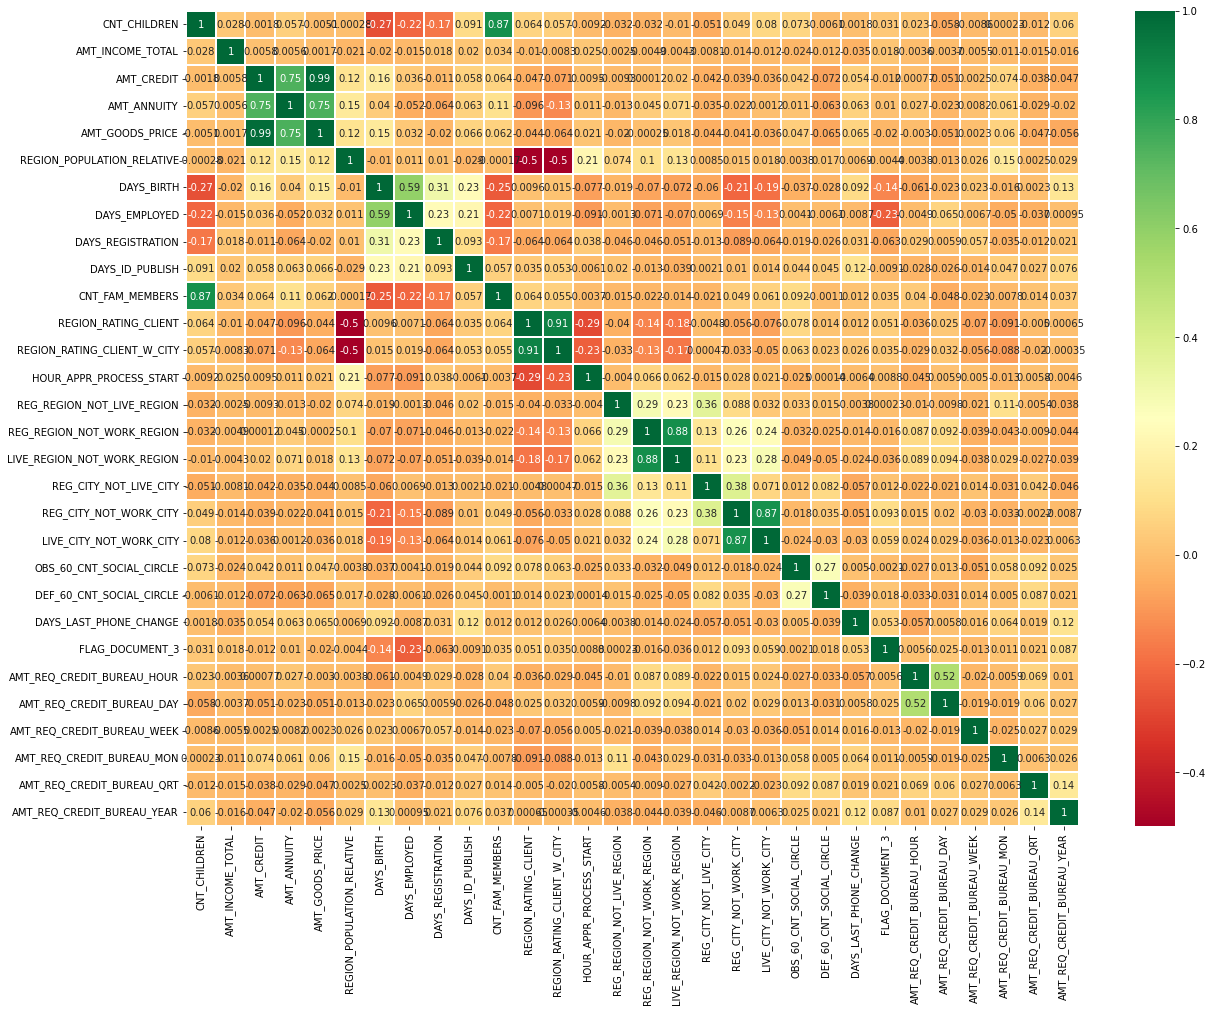

In [192]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

### AFETR ANALYSISNG BOTH CORRELATIONS I.E OF REPAYERS AND DEFAULTERS IT CAN BE SAID THAT:



1.  AMT_CREDIT is highly correlated to AMT_GOODS_PRICE
2.  AMT_CREDIT is also correlated to AMT_ANNUITY VALUE
3.  LIVE_REGION_NOT_WORK_REGION	correlation with REG_REGION_NOT_WORK_REGION	for repayers is little less than that of defaulters.
4.  The loan of people employed for more days are more likely to repay the loan.
5.  There is a severe drop in the correlation between total income of the client and the credit amount amongst defaulters than in repayers.



### Univariate Analysis

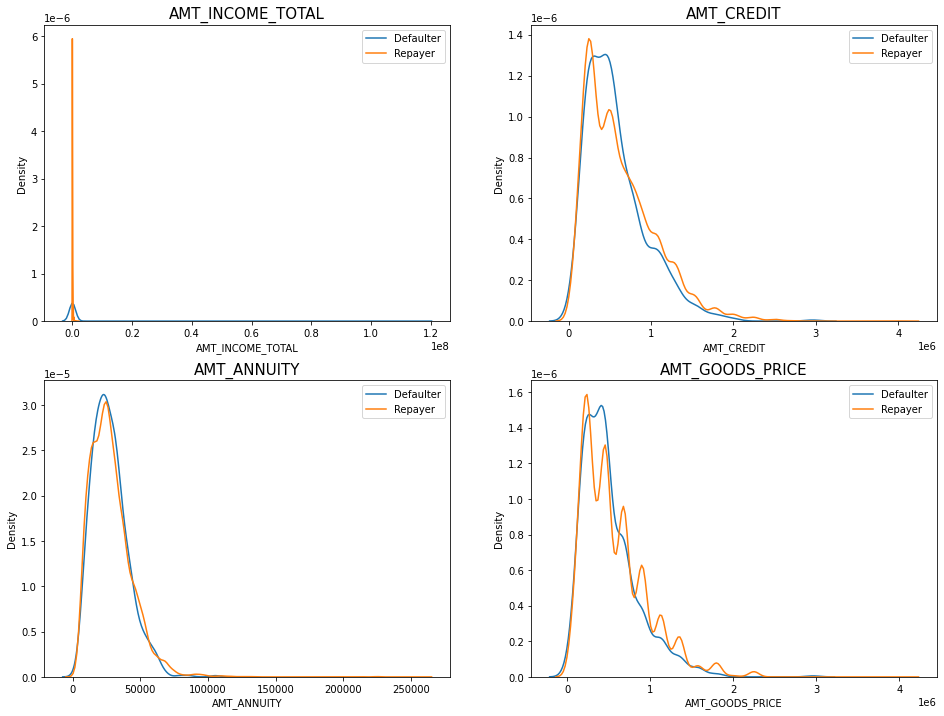

In [188]:
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()



1.  Most people pay annuity below 50K for the credit loan



### Bivariate Analysis

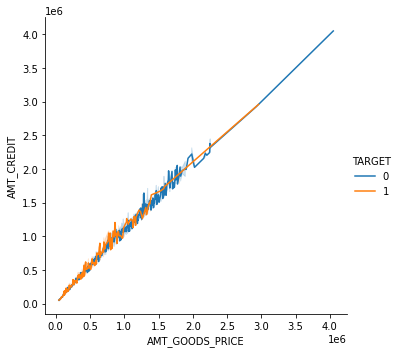

In [187]:
sns.relplot(x="AMT_GOODS_PRICE",y="AMT_CREDIT",data=app_data,kind='line',hue="TARGET")